# Bike Sharing Dataset

#### Background
The bike sharing system is a new generation of traditional bike rentals in which the entire process of membership, leasing, and returning have been automated. With these systems, users can easily rent a bike from a specific location and return at another location. Currently, there are more than 500 bike sharing programs around the world, including more than 500,000 bicycles. Today, there is a great interest in these systems due to their important role in transportation, environmental and health issues.

In addition to the practical application of interesting bike sharing systems, the data characteristics produced by these systems make them attractive for research. Contrary to other transportation services such as buses or subways, the duration of travel, departure and arrival locations is clearly recorded in these systems. This feature transforms the bike sharing system into a virtual sensor network that can be used to sense the mobility of the city. Therefore, it is expected that the most important events in the city can be detected by monitoring these data.

#### Objective
##### The objective of the project is to read it in, wrangle it and data visualization.

In [1]:
# import 'tidyverse' library

library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


##### In R, the dataframes are easily processed using the functions provided by the tiyverse library, so we can load them.

In [38]:
# import dataset

nz_temp_df <- "daily_nz_avg_temperature.csv" %>%
    read_csv() # read data

nz_temp_df %>%    
    head() # to see raw data

Parsed with column specification:
cols(
  ID = col_character(),
  ELEMENT = col_character(),
  DATE = col_double(),
  YEAR = col_double(),
  VALUE = col_double()
)


ID,ELEMENT,DATE,YEAR,VALUE
<chr>,<chr>,<dbl>,<dbl>,<dbl>
NZ000936150,TMAX,20130101,2013,277
NZ000936150,TMIN,20130101,2013,134
NZ000936150,TMAX,20130102,2013,280
NZ000936150,TMAX,20130103,2013,194
NZ000936150,TMAX,20130104,2013,207
NZ000936150,TMIN,20130104,2013,54


##### The read_csv() can import the hour.csv dataset and head() helps us to have a look the raw data.

In [39]:
# check type of columns

nz_temp_df %>%
    glimpse()

Observations: 447,017
Variables: 5
$ ID      <chr> "NZ000936150", "NZ000936150", "NZ000936150", "NZ000936150", "…
$ ELEMENT <chr> "TMAX", "TMIN", "TMAX", "TMAX", "TMAX", "TMIN", "TMAX", "TMIN…
$ DATE    <dbl> 20130101, 20130101, 20130102, 20130103, 20130104, 20130104, 2…
$ YEAR    <dbl> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ VALUE   <dbl> 277, 134, 280, 194, 207, 54, 252, 90, 225, 231, 85, 93, 302, …


##### The glimpse() function can be used to peek at the dataset and check the type of the data for each column, and help us to find out which column is not matching its column type.

##### To change to the type of columns according to their attributes.

##### Now, the type of columns is matching with their columns.

In [40]:
# import 'skimr' library
# check for any missing value

library(skimr) 
nz_temp_df %>%
    skim() %>% 
    kable()  # organise that information into a more compact format

Skim summary statistics  
 n obs: 447017    
 n variables: 5    

Variable type: character

| variable | missing | complete |   n    | min | max | empty | n_unique |
|----------|---------|----------|--------|-----|-----|-------|----------|
| ELEMENT  |    0    |  447017  | 447017 |  4  |  4  |   0   |    2     |
|    ID    |    0    |  447017  | 447017 | 11  | 11  |   0   |    15    |

Variable type: numeric

| variable | missing | complete |   n    |  mean   |    sd     |   p0    |  p25  |  p50  |  p75  | p100  |   hist   |
|----------|---------|----------|--------|---------|-----------|---------|-------|-------|-------|-------|----------|
|   DATE   |    0    |  447017  | 447017 |  2e+07  | 193180.51 | 1.9e+07 | 2e+07 | 2e+07 | 2e+07 | 2e+07 | ▂▅▆▆▇▇▇▆ |
|  VALUE   |    0    |  447017  | 447017 | 124.89  |   67.52   |  -195   |  77   |  126  |  174  |  381  | ▁▁▁▆▇▅▁▁ |
|   YEAR   |    0    |  447017  | 447017 | 1983.93 |   19.32   |  1940   | 1969  | 1985  | 2000  | 2017  | ▂▅▆▆▇▇▇▆

In [41]:
# output a quick summary of the dataset

nz_temp_df %>%
    summary()

      ID              ELEMENT               DATE               YEAR     
 Length:447017      Length:447017      Min.   :19400308   Min.   :1940  
 Class :character   Class :character   1st Qu.:19690402   1st Qu.:1969  
 Mode  :character   Mode  :character   Median :19850910   Median :1985  
                                       Mean   :19839972   Mean   :1984  
                                       3rd Qu.:20000703   3rd Qu.:2000  
                                       Max.   :20170908   Max.   :2017  
     VALUE       
 Min.   :-195.0  
 1st Qu.:  77.0  
 Median : 126.0  
 Mean   : 124.9  
 3rd Qu.: 174.0  
 Max.   : 381.0  

##### The summary() function shows us a summary for each column. According to the summary above, we can find that:
##### 1. The time period in this dataset is from 2011/01/01 to 2012/12/31.
##### 2. The number of bike rentals for the registered user is generally higher than the casual user.

In [35]:
# arranging column cnt in descending order
# cnt: count of total rental bikes including both casual and registered

bike_df_arrange <- bike_df %>% # assign sorted data to a new dataframe
    arrange(desc(cnt))
bike_df_arrange %>%
    head()

ERROR: Error in eval(lhs, parent, parent): object 'bike_df' not found


##### According to the table above, we can find that the total number of bike rentals in September 2012 are very good, because the top five are from September 2012.

In [172]:
# get top 5 according to column registered
# registered: count of registered user

bike_df_arrange %>%
    top_n(5, registered)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<int>,<date>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
15781,2012-10-24,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963
15109,2012-09-26,4,1,9,17,0,3,1,1,0.74,0.6667,0.48,0.2985,77,876,953
15757,2012-10-23,4,1,10,17,0,2,1,1,0.68,0.6364,0.41,0.0000,67,871,938


##### By comparing with the table above, the situation of bike rentals for the registered user is very similar to the total bike rentals above.

In [173]:
# filtering the data in weekend and holiday 

bike_df_arrange %>%
    filter(workingday == 0) %>%  # weekend and holiday：0, working day: 1
    head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<int>,<date>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
14844,2012-09-15,3,1,9,16,0,6,0,2,0.66,0.6212,0.36,0.2239,350,433,783
15032,2012-09-23,4,1,9,12,0,0,0,1,0.56,0.5303,0.43,0.1045,250,526,776
15849,2012-10-27,4,1,10,13,0,6,0,1,0.60,0.6212,0.43,0.2537,310,450,760
14696,2012-09-09,3,1,9,12,0,0,0,1,0.66,0.6212,0.47,0.0000,247,510,757
15011,2012-09-22,3,1,9,15,0,6,0,1,0.74,0.6667,0.48,0.3881,307,443,750
15178,2012-09-29,4,1,9,14,0,6,0,1,0.60,0.6212,0.40,0.2537,302,448,750


##### By comparing with the tables above, bikes are rented mostly on working day, not holiday and weekend, maybe for riding to work.

In [174]:
#filtering the data in 2011 

bike_df_arrange %>%
    filter(yr == 0) %>%  #yr : year (0: 2011, 1:2012)
    head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<int>,<date>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
3884,2011-06-15,2,0,6,17,0,3,1,1,0.74,0.6515,0.28,0.1045,83,555,638
5743,2011-09-01,3,0,9,17,0,4,1,1,0.72,0.6667,0.54,0.2537,61,567,628
6868,2011-10-18,4,0,10,17,0,2,1,1,0.60,0.6061,0.60,0.1343,72,553,625
5565,2011-08-24,3,0,8,18,0,3,1,1,0.74,0.6818,0.55,0.2985,102,519,621
6844,2011-10-17,4,0,10,17,0,1,1,1,0.56,0.5303,0.64,0.1343,80,540,620


##### The bike rental business does better in 2012 than in 2011. This means that more people prefer to choose a bike as transportation.

In [175]:
# selecting columns dteday, workingday, and cnt 
# dteday : date
# cnt: count of total rental bikes including both casual and registered
# workingday： weekend and holiday：0, working day: 1

bike_df_arrange %>%
    select(dteday, workingday, cnt) %>%
    head() 

dteday,workingday,cnt
<date>,<fct>,<int>
2012-09-12,1,977
2012-09-20,1,976
2012-09-11,1,970
2012-09-10,1,968
2012-09-25,1,967
2012-10-24,1,963


##### In order to better analyze the relationships between columns dteday, workingday and cnt, we selected these three columns.

In [176]:
# dropping column holiday
# holiday : weather day is holiday or not

bike_df <- bike_df %>%
    select(-holiday) 

bike_df %>%
    head()

instant,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<int>,<date>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


##### The reason for dropping this column: the function of column holiday is similar to column workingday, so we think we just need to keep one of them.

In [177]:
# renaming the columns whose name is not clear

bike_df <- bike_df %>%
    rename(record_index = instant, date = dteday, year = yr, month = mnth, time = hr, weather_situation = weathersit, temperature = temp, apparent_temperature = atemp, humidity = hum, count = cnt)

bike_df %>%
    head()

record_index,date,season,year,month,time,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,count
<int>,<date>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


##### Because the names of some columns are not very clear, we used rename() function to change their names more clearly, which makes us easier to understand the contents of each column and make the data tidier.

In [178]:
# reordering them

bike_df <- bike_df[, c(1, 2, 14, 15, 16, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)]

bike_df %>% 
    head()

record_index,date,casual,registered,count,season,year,month,time,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed
<int>,<date>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,3,13,16,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000
2,2011-01-01,8,32,40,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0000
3,2011-01-01,5,27,32,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0000
4,2011-01-01,3,10,13,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0000
5,2011-01-01,0,1,1,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0000
6,2011-01-01,0,1,1,1,0,1,5,6,0,2,0.24,0.2576,0.75,0.0896


##### In order to better analyze the relationships between the four columns date, casual, registered, count, we moved the three columns of casual, registered, count behind the column date.

In [9]:
# group the dataframe by month

nz_temp_df_group <- nz_temp_df %>%
    group_by(ID)  

In [10]:
# tally up

nz_temp_df_group %>%
    head()  

ID,ELEMENT,DATE,YEAR,VALUE
<chr>,<chr>,<dbl>,<dbl>,<dbl>
NZ000936150,TMAX,20130101,2013,277
NZ000936150,TMIN,20130101,2013,134
NZ000936150,TMAX,20130102,2013,280
NZ000936150,TMAX,20130103,2013,194
NZ000936150,TMAX,20130104,2013,207
NZ000936150,TMIN,20130104,2013,54


##### We used group_by() to define the group by month and used tally() to count how many rows fall in group.

In [11]:
#summarise

nz_temp_df_group %>%
    summarise(mean_value = mean(VALUE))

ID,mean_value
<chr>,<dbl>
NZ000093012,154.92326
NZ000093292,144.31436
NZ000093417,131.51534
NZ000093844,99.24904
NZ000093994,191.75883
NZ000933090,135.56571
NZ000936150,117.48535
NZ000937470,93.27781
NZ000939450,69.19135


##### The function summarise() took the full column of count and computed the mean count for each month.

In [42]:
# modify existing variables (columns)
# temperature : Normalized temperature in Celsius. The values are divided to 41 (max)
# apparent_temperature : Normalized feeling temperature in Celsius. The values are divided to 50 (max)
# humidity : Normalized humidity. The values are divided to 100 (max)
# windspeed: Normalized wind speed. The values are divided to 67 (max)

nz_temp_df <- nz_temp_df %>%
    mutate(VALUE = VALUE / 10)

nz_temp_df %>%
    head()

ID,ELEMENT,DATE,YEAR,VALUE
<chr>,<chr>,<dbl>,<dbl>,<dbl>
NZ000936150,TMAX,20130101,2013,27.7
NZ000936150,TMIN,20130101,2013,13.4
NZ000936150,TMAX,20130102,2013,28.0
NZ000936150,TMAX,20130103,2013,19.4
NZ000936150,TMAX,20130104,2013,20.7
NZ000936150,TMIN,20130104,2013,5.4


##### The raw values in columns temperature, apparent_temperature, humidity, and windspeed are not making sense. Therefore, we modified the values of these columns according to the descriptions in DataSet_Dictionary.txt.

In [183]:
# produce new variables (columns)

bike_df <- bike_df %>%
    mutate(user_difference = registered - casual)

bike_df %>%
    head()

record_index,date,casual,registered,count,season,year,month,time,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,user_difference
<int>,<date>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2011-01-01,3,13,16,1,0,1,0,6,0,1,9.84,14.395,81,0.0000,10
2,2011-01-01,8,32,40,1,0,1,1,6,0,1,9.02,13.635,80,0.0000,24
3,2011-01-01,5,27,32,1,0,1,2,6,0,1,9.02,13.635,80,0.0000,22
4,2011-01-01,3,10,13,1,0,1,3,6,0,1,9.84,14.395,75,0.0000,7
5,2011-01-01,0,1,1,1,0,1,4,6,0,1,9.84,14.395,75,0.0000,1
6,2011-01-01,0,1,1,1,0,1,5,6,0,2,9.84,12.880,75,6.0032,1


##### We used the mutate() to create a new column called user_difference by using registered value minus casual value in each row. 
##### The column user_difference is used to show the difference amount of bike rentals between casual users and registered users.

In [184]:
# reoder the columns

bike_df <- bike_df[, c(1, 2, 3, 4, 17, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)]

bike_df %>%
    head()

record_index,date,casual,registered,user_difference,count,season,year,month,time,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed
<int>,<date>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,3,13,10,16,1,0,1,0,6,0,1,9.84,14.395,81,0.0000
2,2011-01-01,8,32,24,40,1,0,1,1,6,0,1,9.02,13.635,80,0.0000
3,2011-01-01,5,27,22,32,1,0,1,2,6,0,1,9.02,13.635,80,0.0000
4,2011-01-01,3,10,7,13,1,0,1,3,6,0,1,9.84,14.395,75,0.0000
5,2011-01-01,0,1,1,1,1,0,1,4,6,0,1,9.84,14.395,75,0.0000
6,2011-01-01,0,1,1,1,1,0,1,5,6,0,2,9.84,12.880,75,6.0032


##### The columns user_difference should be closed to columns casual and registered. Therefore, we reordered the columns.

In [185]:
# create a new long format dataframe

bike_df_long <- bike_df %>%
    select(record_index, date, count)

bike_df_long %>%
    head()

record_index,date,count
<int>,<date>,<int>
1,2011-01-01,16
2,2011-01-01,40
3,2011-01-01,32
4,2011-01-01,13
5,2011-01-01,1
6,2011-01-01,1


In [186]:
# change the long format dataframe to wide format

bike_df_spread <- bike_df_long %>%
                      spread(key = date, 
                             value = count)

bike_df_spread %>%
    head()

record_index,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,⋯,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,16,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,40,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,32,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,13,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [187]:
# change the wide format dataframe to long format

bike_df_gather <- bike_df_spread %>%
                      gather(key = date,
                             value =  count,
                             -record_index,
                             na.rm = TRUE)

bike_df_gather %>%
    head()

record_index,date,count
<int>,<chr>,<int>
1,2011-01-01,16
2,2011-01-01,40
3,2011-01-01,32
4,2011-01-01,13
5,2011-01-01,1
6,2011-01-01,1


##### The operations above are just to prove that we can switch back and forth between the long format and the wide format of the dataframe. But we think the original one is already in the tidy data shape. Because each column in the original dataset is valuable and each row in the original dataset is observation and it said its value. Therefore, we are not going to use spread() and gather() functions to tidy our dataset.

In [46]:
# Produce beautiful graphical representations
# The relationship between temperature and the average number of bike rentals

nz_temp_df %>%
    group_by(YEAR, ELEMENT) %>%
    summarise(mean_value = mean(VALUE)) %>%
    ggplot(aes(x = YEAR, y = mean_value)) + xlab("Year") + 
    ylab("Temperature (Celsius)") + ggtitle("The average temperature in New Zealand") +
    geom_line(aes(col=ELEMENT)) + theme_minimal(width=4,height=4)


ERROR: Error in theme_minimal(width = 4, height = 4): unused arguments (width = 4, height = 4)


##### The figure above shows a linear regression between temperature and the number of bike rentals. In general, as the temperature increases, the average number of bike rentals also increases. However, when the temperature exceeds 32 ° C, the average number of bike rentals will decrease.

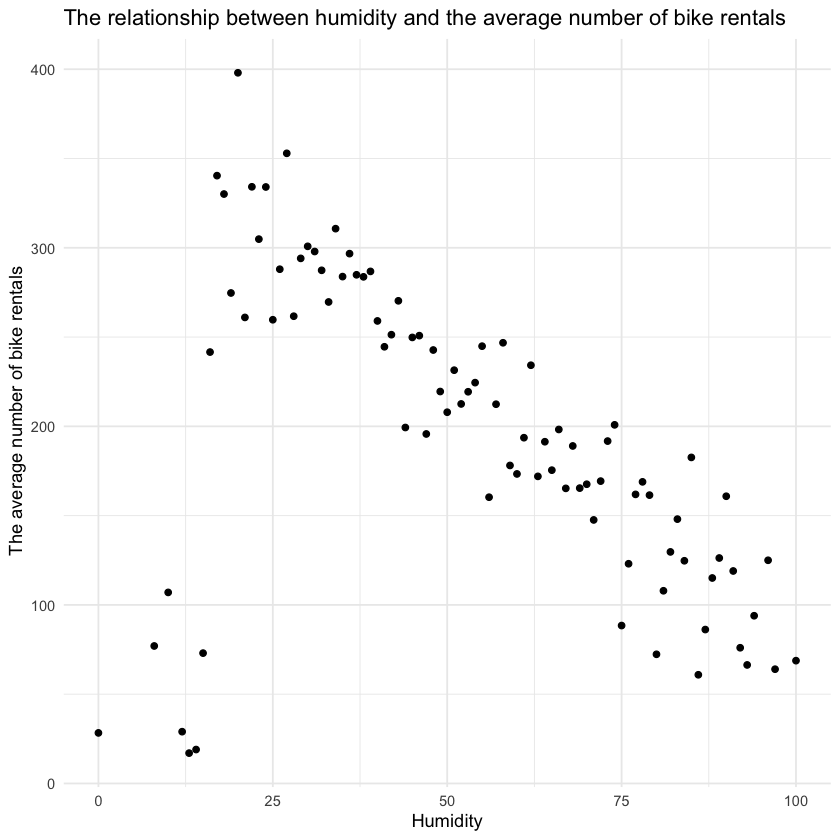

In [189]:
# The relationship between humidity and the average number of bike rentals

my_plot_2 <- bike_df %>%
    group_by(humidity) %>%
    summarise(average_count = mean(count)) %>%
    ggplot(aes(x = humidity, y = average_count)) + xlab("Humidity") +
    ylab(" The average number of bike rentals") + ggtitle("The relationship between humidity and the average number of bike rentals") +
    geom_point() + theme_minimal()

my_plot_2

##### In general, as the value of humidity increases, the average number of bike rentals will decrease. The optimal humidity value for bike rental is approximately 25.

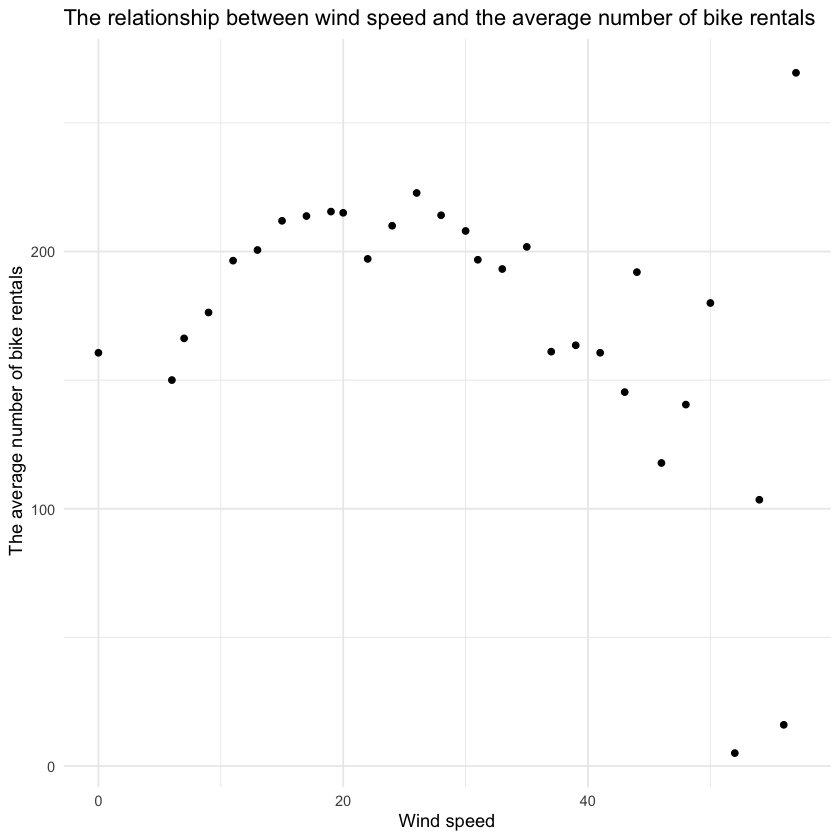

In [190]:
# The relationship between wind speed and the average number of bike rentals

my_plot_3 <- bike_df %>%
    group_by(ELEMENT) %>%
    summarise(average_count = mean(count)) %>%
    ggplot(aes(x = windspeed, y = average_count)) + xlab("Wind speed") +
    ylab(" The average number of bike rentals") + ggtitle("The relationship between wind speed and the average number of bike rentals") +
    geom_point() + theme_minimal()

my_plot_3

##### In general, as the value of wind speed increases, the average number of bike rentals will decrease. The optimal wind speed for bike rental is around 20.

### Task (g): save (5 marks)

Save your plot from Task (f) and your tidy dataset from Task (g) to disk. 

_hint_ useful functions: `write_csv()`, `ggsave()`,...

In [191]:
# get the working directory

getwd()

[1] "/Users/luyao/Desktop"

In [192]:
# Save my plots from Task (f)

ggsave("myplot_1.jpg", plot = my_plot_1, device = "jpg") 
ggsave("myplot_2.jpg", plot = my_plot_2, device = "jpg")
ggsave("myplot_3.jpg", plot = my_plot_3, device = "jpg")

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


In [193]:
# save tidy dataset to disk

bike_df %>% 
    write_csv(path = "bikesharing.csv")

##### We have already saved our plots and tidy dataset to disk.

#### Task (1)
##### Make a heatmap to check the relationship between season, time and the number of bike rentals.

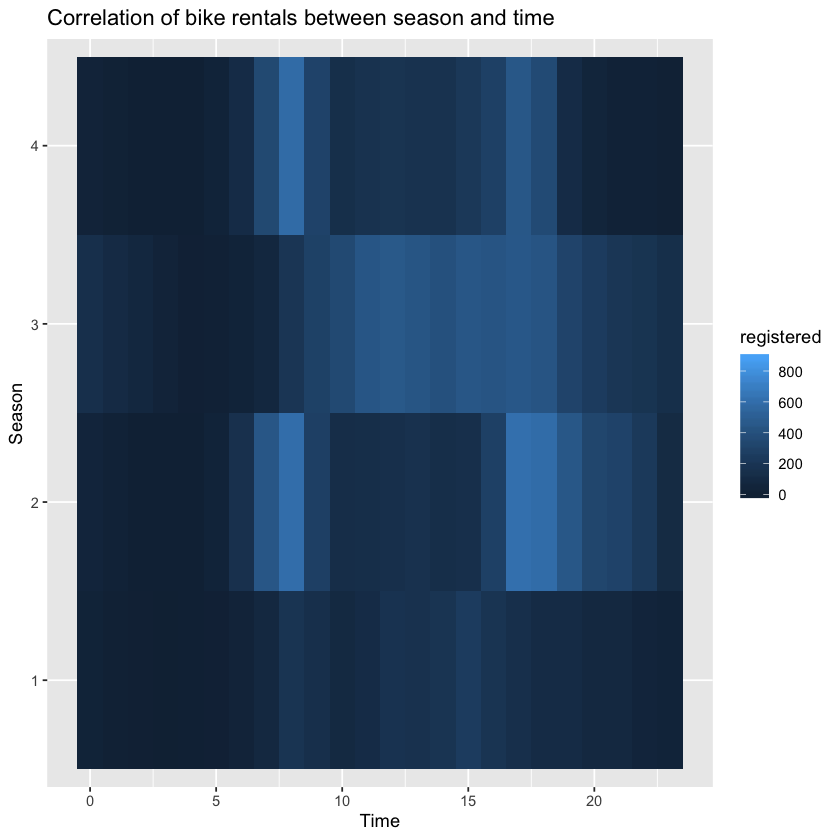

In [194]:
# Correlation of bike rentals for registered between season and time
# time : 0am to 23pm
# season : season (1:spring, 2:summer, 3:fall, 4:winter)

bike_df %>%
    ggplot(aes(x = time, y = season)) +
    geom_tile(aes(fill = registered)) +
    xlab("Time") +
    ylab("Season") +
    ggtitle("Correlation of bike rentals between season and time")

#### Conclusion in Task (1)
##### According to the heatmap above, we can find that: one of the peak times for the registered users renting bikes is between 6 am and 10 am. And we also find that season will affect bike rentals. Therefore, my CEO's finding is correct.

#### Task (2)
##### Make plots to test this hypothesis.

In [195]:
# Coding for weather situation as below:
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

good_weather_days <- bike_df %>%
    filter(weather_situation == 1, time >= 17, time <= 22) %>% # filter good weather day between 5-10 pm
    group_by(date) %>%
    tally() %>% # to see how many hours that weather is good between 5-10pm
    filter(n > 3) # weather should be good for longer than 3 hours to make sure weather on the next day will be good

good_weather_days

date,n
<date>,<int>
2011-01-02,5
2011-01-03,6
2011-01-04,6
2011-01-05,6
2011-01-06,4
2011-01-07,4
2011-01-08,6
2011-01-09,6
2011-01-10,6


In [196]:
# Create new dataframe that stores the day after the good weather day and the number of rentals on the day between 6-10am
next_day_df <- good_weather_days %>%
    mutate(date = date + 1) %>% # to create a new column for the days after the good weather days
    select(date)
next_day_df

date
<date>
2011-01-03
2011-01-04
2011-01-05
2011-01-06
2011-01-07
2011-01-08
2011-01-09
2011-01-10
2011-01-11


In [197]:
# Join bike_df with next_day_df by date
next_day_df <- next_day_df %>%
    left_join(bike_df, by = "date")

In [198]:
# Rearrange dataframe to show date, registered and seasons
next_day_df <- next_day_df %>%
    filter(time >=6, time <= 10) %>%
    select(date, registered, season)

In [199]:
# Calculating average of number of rentals between 6-10am considering all weather situations
bike_df %>%
    filter(time >= 6, time <=10) %>%
    group_by(date) %>%
    summarise(registered = sum(registered)) %>%
    summarise(average_registered = mean(registered))

average_registered
<dbl>
925.6355


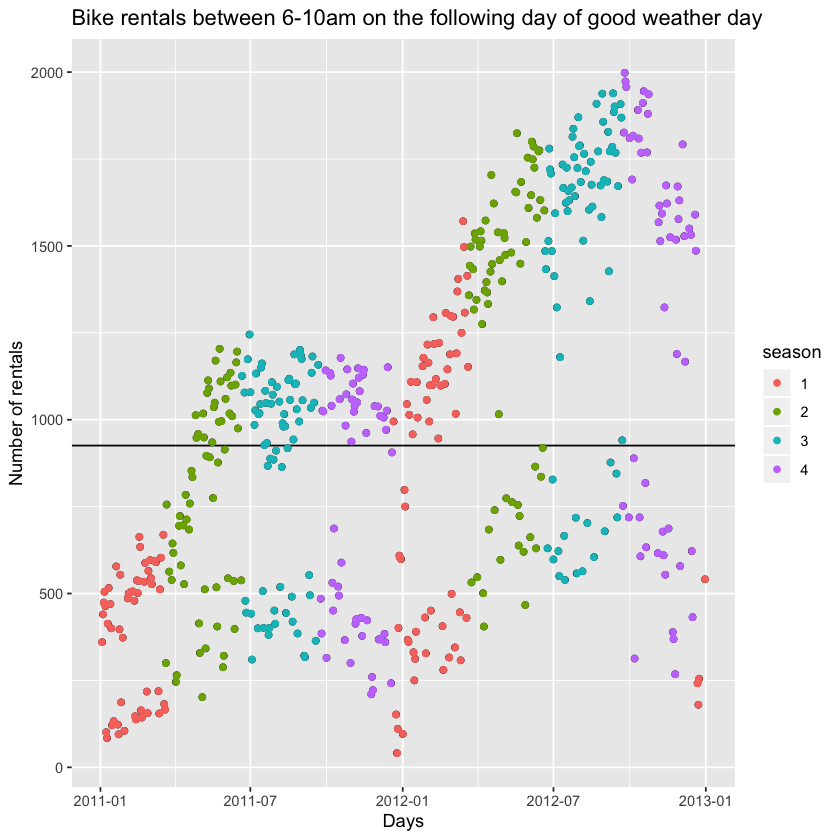

In [200]:
# Plot bike rentals between 6-10am on the following day of good weather day

next_day_df  %>%
    group_by(date, season) %>%
    summarise(registered = sum(registered)) %>%
    ggplot(aes(x = date, y = registered)) +
        xlab('Days') + ylab('Number of rentals') +
        ggtitle('Bike rentals between 6-10am on the following day of good weather day') +
        geom_point() +
        geom_hline(yintercept=925.64, color = "black") +
        geom_jitter(aes(col=season)) # consideraing seasons into graphs

#### Conclusion in Task (2)
##### From the figure above, we can see that, between 6am-10am on the day after the good weather day, there are more days that large number of rentals occured than the ones below the average. This means that the hypothesis of CEO is reasonably true: if the weather seems good from 5pm to 10pm on a day, then registered users tend to rent bikes between 6am-10am on the following day.